In [1]:
import numpy as np
X = np.load('data/x_data.npy')
Y = np.load('data/y_data.npy')

In [2]:
tasks = {}

for x,y in zip(X,Y):
    if y in tasks:
        tasks[y]['data'].append(np.array(x[2:]))
        tasks[y]['target'].append(x[0])
    else:
        tasks[y] = {}
        tasks[y]['data'] = [np.array(x[2:])]
        tasks[y]['target'] = [x[0]]


In [3]:
print(tasks['CHEMBL2114881']['target'])

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [4]:
index = 1
top_targets = {}
for key, value in sorted(tasks.items(), key=lambda item: len(item[1]['target']), reverse=True):
    top_targets[key] = {}
    top_targets[key]['data'] = np.array(value['data'])
    top_targets[key]['target'] = np.array(value['target'])

    if index == 100:
        break
    index +=1 

## These are the top 100 targets that will be trained

In [5]:
print(list(top_targets))

['CHEMBL2114881', 'CHEMBL2114714', 'CHEMBL1963941', 'CHEMBL1963883', 'CHEMBL3562022', 'CHEMBL1614063', 'CHEMBL1738498', 'CHEMBL3881499', 'CHEMBL1614432', 'CHEMBL1613885', 'CHEMBL4028923', 'CHEMBL2218781', 'CHEMBL3880337', 'CHEMBL3880339', 'CHEMBL3880338', 'CHEMBL4028921', 'CHEMBL4028924', 'CHEMBL3705123', 'CHEMBL1613799', 'CHEMBL4028922', 'CHEMBL1738424', 'CHEMBL3880340', 'CHEMBL1738407', 'CHEMBL4017550', 'CHEMBL3706327', 'CHEMBL3880341', 'CHEMBL3436039', 'CHEMBL3436040', 'CHEMBL1614547', 'CHEMBL3436041', 'CHEMBL3431934', 'CHEMBL3880334', 'CHEMBL3880335', 'CHEMBL1614423', 'CHEMBL3880344', 'CHEMBL1964096', 'CHEMBL3431931', 'CHEMBL1964000', 'CHEMBL1614199', 'CHEMBL2114818', 'CHEMBL2114719', 'CHEMBL3880342', 'CHEMBL1963965', 'CHEMBL1119333', 'CHEMBL1614549', 'CHEMBL3734174', 'CHEMBL3887033', 'CHEMBL1614359', 'CHEMBL1006579', 'CHEMBL3707950', 'CHEMBL2114737', 'CHEMBL3882758', 'CHEMBL3215171', 'CHEMBL3883019', 'CHEMBL3882757', 'CHEMBL2114791', 'CHEMBL3214986', 'CHEMBL3707758', 'CHEMBL211474

In [6]:
print(top_targets['CHEMBL2114881']['data'])

[[1.0 0.0 0.0 ... 1.0 0.0 1.0]
 [1.0 0.0 0.0 ... 0.0 0.0 0.0]
 [1.0 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [1.0 0.0 0.0 ... 0.0 0.0 0.0]
 [1.0 0.0 0.0 ... 0.0 0.0 0.0]
 [1.0 0.0 0.0 ... 0.0 0.0 0.0]]


In [7]:
from keras.layers import Input, Dense
from keras.models import Model
import time

inputs = Input(shape=(512,))
shared_mlp = Dense(64, activation='relu')(inputs)
shared_mlp = Dense(64, activation='relu')(shared_mlp)

# make a dictionary of models for each task
models_mtl = dict()
print('Creating Sub Models:')
og_start = time.time()
index = 1
for x in top_targets.keys():
    start = time.time()
    personal_layer = Dense(10, activation='relu')(shared_mlp)
    output_layer = Dense(1)(personal_layer)
    model = Model(inputs=inputs, outputs=output_layer)
    model.compile(optimizer='sgd', loss='mean_squared_error')
    models_mtl[x] = model
    end = time.time()
    
    print("Model: ", index, " | Section Time: ", end - start, " | Elapsed Time: ", end - og_start)
    index += 1

Using TensorFlow backend.


Creating Sub Models:
Model:  1  | Section Time:  0.026784181594848633  | Elapsed Time:  0.026784181594848633
Model:  2  | Section Time:  0.02628779411315918  | Elapsed Time:  0.05406379699707031
Model:  3  | Section Time:  0.024799585342407227  | Elapsed Time:  0.07985591888427734
Model:  4  | Section Time:  0.025295257568359375  | Elapsed Time:  0.10614371299743652
Model:  5  | Section Time:  0.02479863166809082  | Elapsed Time:  0.13193559646606445
Model:  6  | Section Time:  0.024799823760986328  | Elapsed Time:  0.15772795677185059
Model:  7  | Section Time:  0.024799346923828125  | Elapsed Time:  0.18351960182189941
Model:  8  | Section Time:  0.03372979164123535  | Elapsed Time:  0.21774506568908691
Model:  9  | Section Time:  0.03174090385437012  | Elapsed Time:  0.2499840259552002
Model:  10  | Section Time:  0.027776002883911133  | Elapsed Time:  0.27875185012817383
Model:  11  | Section Time:  0.02628803253173828  | Elapsed Time:  0.3060319423675537
Model:  12  | Section Time

Model:  100  | Section Time:  0.02529597282409668  | Elapsed Time:  2.895646810531616


In [8]:
from sklearn.model_selection import train_test_split

test_size = 0.2

X_train = dict()
y_train = dict()
X_test = dict()
y_test = dict()

#print(top_targets[x][0])

for x in top_targets.keys():
    X_train[x], X_test[x], y_train[x], y_test[x] = train_test_split(top_targets[x]['data'], 
                                                        top_targets[x]['target'], 
                                                        test_size=test_size, 
                                                        random_state=42)


In [9]:
%%time
EPOCHS = 20
from random import shuffle

all_keys = list(top_targets)
for i in range(EPOCHS):
    print('Epoch',i,end=', ')
    shuffle(all_keys)
    for x in all_keys:
        models_mtl[x].fit(X_train[x],y_train[x], verbose=0)

Epoch 0, Epoch 1, Epoch 2, Epoch 3, Epoch 4, Epoch 5, Epoch 6, Epoch 7, Epoch 8, Epoch 9, Epoch 10, Epoch 11, Epoch 12, Epoch 13, Epoch 14, Epoch 15, Epoch 16, Epoch 17, Epoch 18, Epoch 19, Wall time: 2min 36s


## Evaluating the Train-Test Split Data

In [10]:
%%time
y_mtl=[]
yhat_mtl=[]

for x in X_test.keys():
    yhat_mlp = models_mtl[x].predict(X_test[x])

    y_mtl.append(y_test[x].ravel())
    yhat_mtl.append(yhat_mlp.ravel())

Wall time: 54.6 s


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, accuracy_score 
from sklearn.metrics import precision_score, mean_squared_log_error

def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    plt.figure(figsize=(15,10))
    plt.scatter(mean, diff, *args, **kwargs)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')
    plt.title("Bland Altman, MSE: "+str(mean_squared_error(data1,data2)))
    plt.xlabel('Mean Score', fontsize=8)
    plt.ylabel('Diff Score', fontsize=8)
    plt.show()

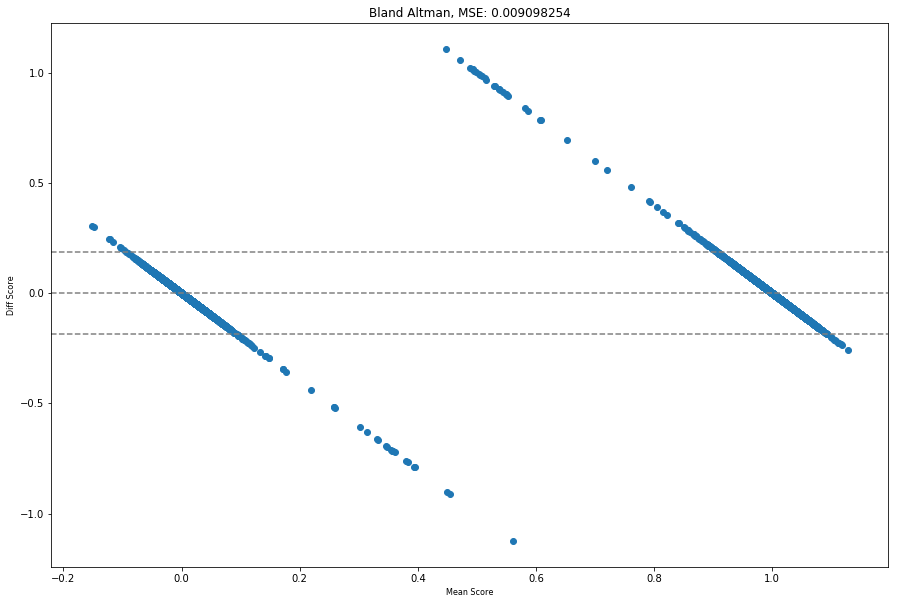

In [12]:
bland_altman_plot(np.concatenate(y_mtl), np.concatenate(yhat_mtl))

In [13]:
from rdkit.ML.Scoring import Scoring

In [14]:
import pandas as pd

scores = {'y_mtl':np.concatenate(y_mtl), 'yhat_mtl':np.concatenate(yhat_mtl)}
df = pd.DataFrame(scores)

In [15]:
score_auc = Scoring.CalcAUC(df.values, 0)
print(score_auc)

0.3569572570198806


Looking at the AUC score, we can see that the performance of our model is very bad. With a score of 0.5 representing random chance, we can see that we are well below random chance in our outputs. This is very bad news for a classifier, as random chance should be a sanity check and the starting point from which a classifier improves. This implies that something very wrong is happening with the classifier

In [16]:
score_bedroc = Scoring.CalcBEDROC(df.values, 0, 20)
print(score_bedroc)

0.006959956243419538


The BEDROC metric is a modification of the ROC curve. This metric uses an alpha value to weight the probability distribution in which a random value is selected from. In our application, we used an alpha value of 20.

Looking at our results, our value is exceptionally poor.

In [20]:
score_enrich = Scoring.CalcEnrichment(df.values, 0, [.01, .1, .25, .5])
print(score_enrich)

[0.0, 0.0, 0.21011197387585465, 0.7983050847457627]


The Enrichment factor represents the number of correctly classified ligands within a certain top percentage of the sample divided by the total sample. 
We ran the Enrichment scorer on a variety of values: 1%, 10%, 25%, and 50%. 
The values we got say that for the first 1% and 10% of samples, we got none of the ligands classified correctly. Then when we move to 25% and 50%, the values increase dramatically.